# Zip Code Clustering Tutorial

In this tutorial, we illustrate clustering with the K-Means algorithm using zip codes and their associated GPS coordinates.  Our data set contains entries for ~33,000 zip codes.  We find that these zip codes can be clustered into approximately 6-8 clusters, corresponding to larger geographic regions of the U.S. like New England or the Midwest.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

## Load Data

We load our data set from a CSV file into a Pandas DataFrame.  We have ~33,000 zip codes each with a corresponding city, state, latitude and longitude.

In [2]:
zip_codes = pd.read_csv("zips.csv")

In [3]:
zip_codes.head()

,zip code,state abbreviation,latitude,longitude,city,state
0,35004,AL,33.606379,-86.50249,Moody,Alabama
1,35005,AL,33.592585,-86.95969,Adamsville,Alabama
2,35006,AL,33.451714,-87.23957,Adger,Alabama
3,35007,AL,33.232422,-86.80871,Alabaster,Alabama
4,35010,AL,32.903432,-85.92669,Alexander City,Alabama


In [4]:
len(zip_codes)

33178

In [5]:
zip_codes.dtypes

zip code               object
state abbreviation     object
latitude              float64
longitude             float64
city                   object
state                  object
dtype: object

## Visualizing the Zip Codes

Before we cluste the zip codes, we can plot the zip codes by their longitude and latitude using Seaborn's `jointplot`.

C:\Users\nowling\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nowling\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


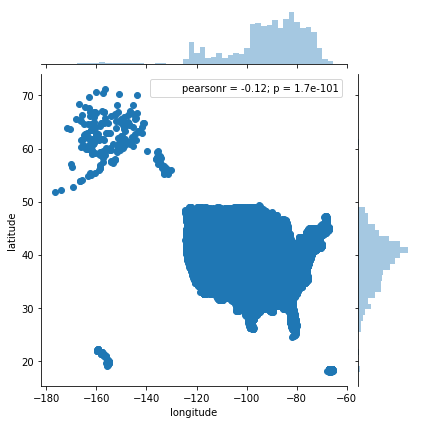

In [6]:
sns.jointplot(zip_codes["longitude"], zip_codes["latitude"], kind="scatter")

The plot of the zip codes recreates the shape of the continental U.S., Alaska, Hawaii, and Peurto Rico / Gaum.

## Clustering

We'll now cluster the zip codes using the [K-Means algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).  K-Means requires that we specify the parameter `k`, the number of clusters.  A common way of finding `k` is to make and interpret a silhouette plot.  We generate this plot by clustering the data points with different values for `k`, calculating the inertia or sum of squared errors for each `k`, and then plotting the inerta vs the values of `k`.  We then look for the value of `k` that comes after the "elbow" in the plot.

Text(0,0.5,'Inertia')

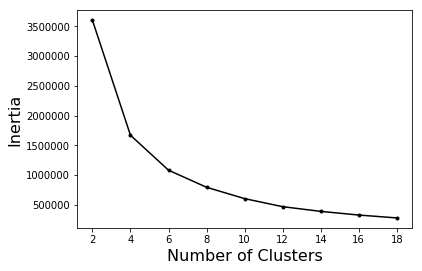

In [7]:
features = zip_codes[["longitude", "latitude"]].values

inertias = []
ks = list(range(2, 20, 2))
for k in ks:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)
    
plt.plot(ks, inertias, "k.-")
plt.xlabel("Number of Clusters", fontsize=16)
plt.ylabel("Inertia", fontsize=16)

Our silhouette plot indicates that 6, 8, or 10 clusters would be suitable choices for these data.  Let's try clustering the zip codes with value and plotting the cluster centers on top of our original zip codes to see how they relate.

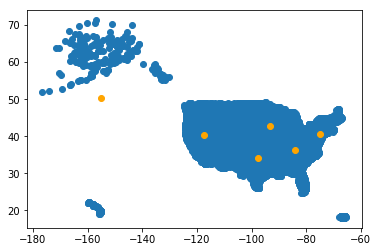

In [8]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(features)

plt.scatter(zip_codes["longitude"], zip_codes["latitude"])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="orange")

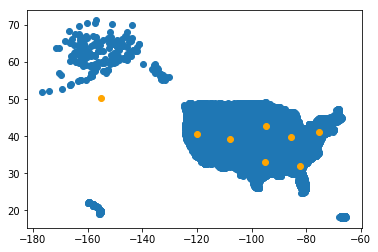

In [9]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(features)

plt.scatter(zip_codes["longitude"], zip_codes["latitude"])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="orange")

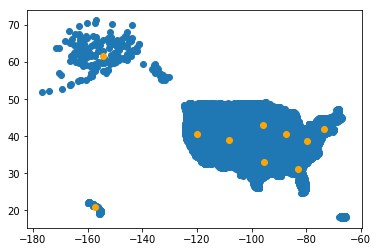

In [10]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(features)

plt.scatter(zip_codes["longitude"], zip_codes["latitude"])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="orange")

With 10 clusters, we can represent the major geographic regions of the U.S. quite well.  Alaska and Hawaii each get one cluster.  The remaining clusters correspond to regions such as the Pacific coast, New England, and the South.

## Conclusions

We've demonstrated the basics of how to use K-Means clustering.  We choose zip codes as a data set both because they are easy to visualize but also because many data sets incorporate a spatial component.  For example, consider the problems of predicting real estate prices or weather across the country.

Unfortunately, zip codes do not always generalize well.  For example, records with zip codes for areas with small populations like Montana may be rare and may not present in a training set.  This can create a problem at predicting time when a record with one of the missing zip codes appears.

To get around this problem, all zip codes could be converted to GPS coordinates.  The U.S. is quite a large country with substantial variations in geography and culture.  There may not be a simple linear relationship between latitude and longitude and a given outcome variable.

Instead, we can generate categorical features from the clusters. We generate the clusters from the GPS coordinates of all U.S. zip codes like the one used here.  We can then transform the zip codes used in training and testing sets by mapping the zip codes to GPS coordinates and then assigning the GPS coordinates to clusters.  The cluster assignments can then be used as categorical variables.